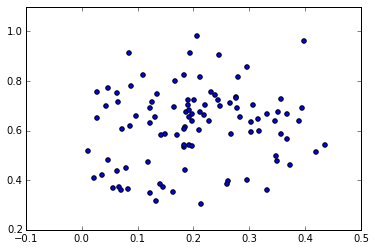

In [23]:
%matplotlib inline
import random
import math
import matplotlib.pyplot as plt
import numpy as np

sigma_o = 0.1

def rejectSampleGauss((x,y)):
    _x = x+random.gauss(0, sigma_o)
    _y = y+random.gauss(0, sigma_o)
    return (_x,_y) if 0<=_x<=1 and 0<=_y<=1 else rejectSampleGauss((x,y))

nObj = 100
weights = [10.0 if random.random()>0.75 else 1.0 for o in range(nObj)]
rx, ry = 1.0, 1.0
k = 3
gc = [(random.random(), random.random()) for t in range(k)]
pAssign = [int(random.random()*k) for t in range(nObj)]
points = [(t, rejectSampleGauss(gc[pAssign[t]])) for t in range(nObj)]
plt.scatter([x for (t, (x,y)) in points], [y for (t, (x,y)) in points])
plt.show()

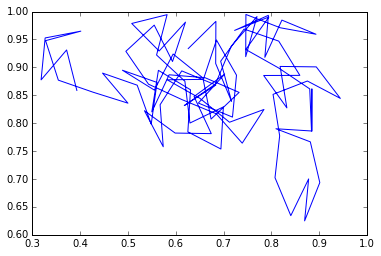

In [24]:
sl, su = 1.0/30, 3.0/30
sigma_p = 1.0

def normalize((vx, vy), speed):
    lennorm = math.sqrt(vx**2+vy**2)
    return (vx/lennorm*speed, vy/lennorm*speed)

def move((ux, uy), (vx, vy), speed):
    speeed = random.random()*(su-sl)+sl
    (_vx, _vy) = normalize((vx+random.gauss(0, sigma_p), vy+random.gauss(0, sigma_p)), speed)
    return ((ux+_vx, uy+_vy), (_vx, _vy), speed) if 0<=ux+_vx<=1 and 0<=uy+_vy<=1 else move((ux, uy), (vx, vy), speed) 

speed = random.random()*(su-sl)+sl
ux, uy = random.random(), random.random()
vx, vy = normalize((random.random(), random.random()), speed)

timeMax = 100
movement = [((ux, uy), (vx,vy), speed)]
for t in xrange(timeMax):
    movement.append(move(*movement[-1]))
    
plt.plot([x for ((x,y), (vx,vy), speed) in movement], [y for ((x,y), (vx,vy), speed) in movement])
plt.show()

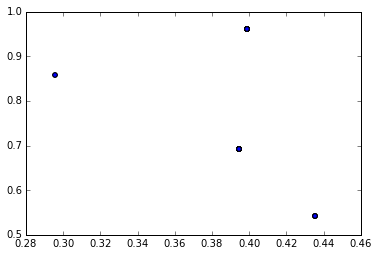

In [27]:
dropout = 0.10
objectSeen = []
for m in movement:
    if random.random()<dropout:
        objectSeen.append([])
    else:
        objectSeen.append(
            [min([
                        ( (p[0]-m[0][0])**2+(p[1]-m[0][1])**2,
                          (t,p) ) 
                                for (t,p) in points])
             [1]])

plt.scatter([scene[0][1][0] for scene in objectSeen if len(scene)>0], [scene[0][1][1] for scene in objectSeen if len(scene)>0])
plt.show()

In [22]:
#Naive Strategy
contractSeen = map(lambda x: x[0], filter(lambda x: len(x)>0, objectSeen))
uniqueSeen = [contractSeen[]]+[contractSeen[t+1] if contractSeen[t] != contractSeen[t+1] for t in range(len(contractSeen)-1)]
set(scene[0] for scene in objectSeen if len(scene)>0)


43


{(0.3329240153112116, 0.656137993646861),
 (0.5813407300527387, 0.34291349553791217),
 (0.596584808786625, 0.7002660943524112),
 (0.6675946326322448, 0.5215574843978654),
 (0.6785601808610922, 0.473132664522629),
 (0.6830540331221296, 0.4050739370505643),
 (0.692599401840737, 0.39400837128980515),
 (0.705507236705045, 0.4267208581837372),
 (0.7218532335212333, 0.3382804467043341),
 (0.7338148566071888, 0.2883766583138855),
 (0.7628801928416387, 0.41698500098489955),
 (0.76524974294973, 0.43011768481574786),
 (0.7982012339074038, 0.4289202575206623),
 (0.8253469409738744, 0.2979978672467509),
 (0.8281267947123613, 0.4659414176804728),
 (0.828485871166477, 0.44993646192694786),
 (0.8528576003300766, 0.4133965176250688),
 (0.8676509390930472, 0.4285055507052296),
 (0.871689244974255, 0.5000672397752441),
 (0.8986525346943134, 0.40840221193873905),
 (0.9095360819778707, 0.3830166683818088)}